Wha is gensim?
- popular open-source NLP library
- Uses top academic models to perform complex tasks
	- building document or word vectors
	- Performing topic identification and document comparison

What is a word vector?
- A word embeddng or vector is trained from large corpus and is a multi-dimensional representation of a word or document.
- with these vectors, we can then see relationships among the words or documents based on how near or far they are and also what similar comparison we find 
- ex) king - quen = men - women
- The deep learning algorithm used to create word vectors has been able to distill this meaning based on how those words are used throughtout the text

Whar are word vectors and how do they help with NLP?
- Word vectors are multi-dimensional mathematical representations of words created using deep learning method. They give us insight into relationships between words in a corpus.

What is LDA?
- LDA stands for latent dirichlet allocation, and it is a statistical model we can apply to text using Gensim for topic analysis and modelling. 



#### Creating and querying a corpus with gensim
you'll use these data structures to investigate word trends and potential interesting topics in your document set.

In [19]:
from sklearn.datasets import fetch_20newsgroups
text_data = fetch_20newsgroups(subset='train')['data'][:10]

import nltk
from nltk.tokenize import word_tokenize

In [24]:
text_data[9]

"From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubject: Re: Sigma Designs Double up??\nArticle-I.D.: ux1.C52u8x.B62\nOrganization: University of Illinois at Urbana\nLines: 29\n\njap10@po.CWRU.Edu (Joseph A. Pellettiere) writes:\n\n\n>\tI am looking for any information about the Sigma Designs\n>\tdouble up board.  All I can figure out is that it is a\n>\thardware compression board that works with AutoDoubler, but\n>\tI am not sure about this.  Also how much would one cost?\n\nI've had the board for over a year, and it does work with Diskdoubler,\nbut not with Autodoubler, due to a licensing problem with Stac Technologies,\nthe owners of the board's compression technology. (I'm writing this\nfrom memory; I've lost the reference. Please correct me if I'm wrong.)\n\nUsing the board, I've had problems with file icons being lost, but it's\nhard to say whether it's the board's fault or something else; however,\nif I decompress the troubled file and recompress it without the board,\nthe icon usuall

In [75]:
# Import Counter
from collections import Counter

# Tokenize the article: tokensa
tokens = [word_tokenize(t) for t in text_data]
tokens

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [[t.lower() for t in i] for i in tokens]

In [76]:
from nltk.corpus import stopwords 
english_stops = stopwords.words('english')

In [77]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = []
for t in lower_tokens:
    ddd = [t for t in t if t.isalpha()]
    alpha_only.append(ddd)

In [78]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

In [85]:
articles = []
for t in alpha_only:
    ddd = [i for i in t if i not in english_stops]
    articles.append(ddd)

In [87]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

#Select the id for "computer": computer_id
car_id = dictionary.token2id.get("car")

# Use computer_id with the dictionary to print the word
print(dictionary.get(car_id))

car


In [88]:
# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

[(23, 1), (31, 1), (35, 1), (42, 1), (48, 1), (126, 1), (134, 1), (166, 1), (169, 1), (187, 2)]


#### Gensim bag-of-words

Now, you'll use your new gensim corpus and dictionary to see the most common terms per document and across all documents.

In [89]:
from collections import defaultdict
import itertools
# Save the fifth document: doc
doc = corpus[2]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
#for word_id, word_count in bow_doc[:5]:
 #   print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

weapons 13
lines 10
organization 10
subject 10
article 10


#### TF_IDF with gensim
- term frequency - inverse document frequency
- allows you to determine the most important words in each document
- each corpus may have shared words beyond just stopwords
- these words should be down-weighted in importance
- ensure most common words don't show up as key words
- keeps document specific frequent words weighted high

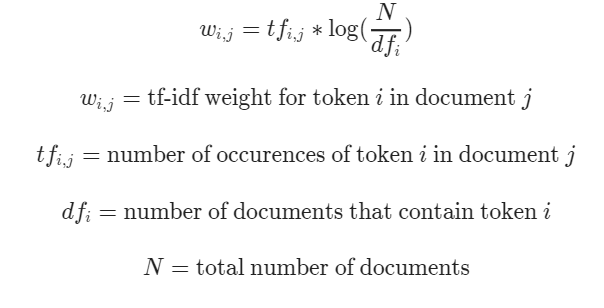

In [90]:
# Create a new TfidfModel using the corpus: tfidf
from gensim.models import tfidfmodel

tfidf = tfidfmodel.TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]
tfidf_weights
# Print the first five weights
print(tfidf_weights[:5])

[(9, 0.11774605844508185), (19, 0.059740896516537106), (20, 0.029870448258268553), (25, 0.03924868614836061), (35, 0.059740896516537106)]


In [92]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
dictionary
# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

anybody 0.22518807564448462
display 0.22518807564448462
heard 0.22518807564448462
powerbook 0.22518807564448462
around 0.15012538376298973
